In [2]:
from helpers import *
bm_dens_col_name = "bm_dens"
bm_dens_bins = (
    Bin(bm_dens_col_name, 1, "First bin", 0, 20, simplekml.Color.yellow),
    Bin(bm_dens_col_name, 2, "Second bin", 20, 40, simplekml.Color.hex("5CFF21")),
    Bin(bm_dens_col_name, 3, "Third bin", 40, 60, simplekml.Color.hex("3B9C17"), "[]"),
)

In [4]:
# Open shapefile with geopandas
shape_folder = "shp_files/"
file_name = shape_folder+"only_bm_seg.shp.zip"
geo_df = gp.read_file(file_name)

<Axes: >

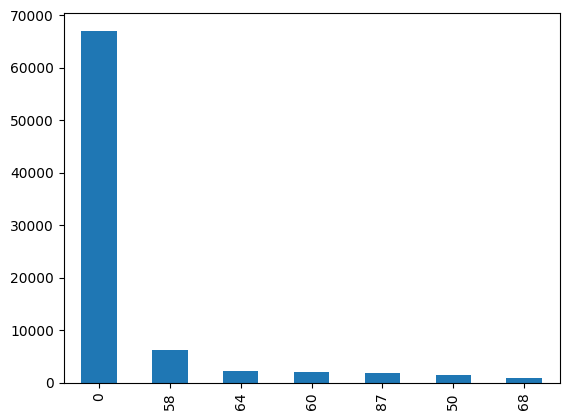

In [12]:
# geo_df[(geo_df["bm_size"] > 20) & (geo_df["bm_size"] <= 40)]
geo_df["bm_size"].value_counts().plot(kind="bar")

In [4]:
# Open shapefile with geopandas
shape_folder = "shp_files/"
file_name = shape_folder+"only_bm_seg-bm_dens-bin_2_polygons.shp.zip"
geo_df = gp.read_file(file_name)
geo_df = geo_df[geo_df["DN"] != 0]
united: sp.MultiPolygon
united = sp.unary_union(geo_df["geometry"])

In [5]:
sample = united.simplify(tolerance=0.0001)
assert sample != united

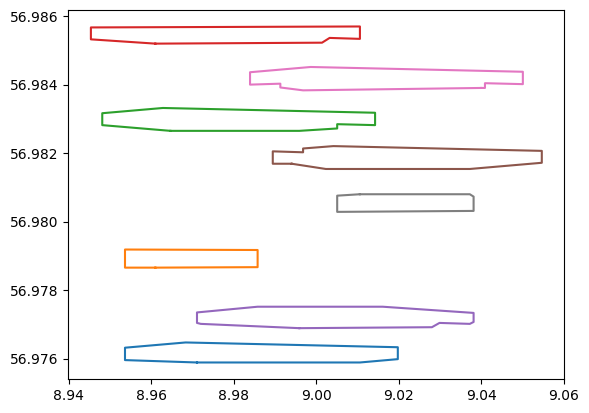

In [8]:
import matplotlib.pyplot as plt
# Plot polygons from multipolygon
for polygon in sample.geoms:
    plt.plot(*polygon.exterior.xy)
# plt.plot(*sample.exterior.xy)

In [32]:
def make_kml_from_one_polygon(
    file_name: str, polygon: sp.Polygon | sp.MultiPolygon, bin: Bin
) -> str:
    kml = simplekml.Kml()
    multipolodd = kml.newmultigeometry(name="MultiPoly")

    if isinstance(polygon, sp.Polygon):
        polygon = multipolodd.newpolygon(
            name="polygon",
            outerboundaryis=list(polygon.exterior.coords),
        )
        polygon.style.polystyle.color = bin.colour
        polygon.style.polystyle.outline = 0
    elif isinstance(polygon, sp.MultiPolygon):
        for polygon in polygon.geoms:
            pol = multipolodd.newpolygon(
                name="polygon",
                outerboundaryis=list(polygon.exterior.coords),
            )
            pol.style.polystyle.color = bin.colour
            pol.style.polystyle.outline = 0
    else:
        raise TypeError("Polygon must be a shapely Polygon or MultiPolygon")
    file_path = "kml_files/"+file_name + ".kml"
    kml.save(file_path)
    logging.info("Saved kml file to " + file_path)
    return file_name


make_kml_from_one_polygon(file_name="Bin_2_multi", polygon=sample, bin= bm_dens_bins[2])

'Bin_2_multi'

In [19]:
geo_df.shape

(2461, 2)

In [18]:
len(united.geoms)

8

In [20]:
dissolved_df = geo_df = geo_df.dissolve(by="DN")

In [29]:
# count number of polygons in dissolved_df
count = 0
for m in dissolved_df["geometry"]:
    for p in m.geoms:
        count += 1
        # print(p)
print(count)

2461
